# *🏋️ Predict Calorie Expenditure | RMSLE Optimized XGBoost & Feature Engineering*

![](https://www.kaggle.com/competitions/91716/images/header)

# *🔥 Predict Calorie Expenditure*
### *Kaggle Playground Series S5E5*

This notebook presents an end-to-end machine learning solution for predicting calorie expenditure during workouts.

## *📌 Problem Type*
- Regression
- Evaluation Metric: **RMSLE (Root Mean Squared Logarithmic Error)**

## *🎯 Goal*
Predict the number of calories burned based on:
- Sex
- Age
- Height
- Weight
- Duration
- Heart Rate
- Body Temperature
- BMI

## *⚙️ Approach*
- Exploratory Data Analysis (EDA)
- Feature Engineering (BMI)
- Categorical Encoding
- Model Comparison
- XGBoost Optimization
- Final Model Training
- Model Export (.pkl)

---

📈 Best Model: **XGBoost**

## *Import*

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 55)  
# Pandas DataFrame çıktılarında tüm sütunların görünmesini sağlar.

import warnings
warnings.filterwarnings('ignore')  
# Uyarıları gizler, böylece kod çalışırken kullanıcıyı rahatsız etmez.

from sklearn.linear_model import LinearRegression, Ridge, Lasso
# LinearRegression: Doğrusal regresyon modelini kullanır.
# Ridge: L2 regularizasyonu ile doğrusal regresyon.
# Lasso: L1 regularizasyonu ile doğrusal regresyon.

from sklearn.model_selection import train_test_split
# Veriyi eğitim ve test setlerine ayırır.

from sklearn.metrics import r2_score, mean_squared_error
# r2_score: Modelin açıklama gücünü ölçer.
# mean_squared_error: Modelin hata oranını ölçer, kareler ortalaması hatası.

import numpy as np  # NumPy, matematiksel ve matris işlemleri için kullanılır.

import matplotlib.pyplot as plt 
# Veriyi görselleştirmek için grafikler çizen kütüphane.

import seaborn as sns 
# Veri görselleştirme kütüphanesi, genellikle daha estetik ve kompleks grafikler oluşturur.

## *Read Data*

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s5e5/sample_submission.csv
/kaggle/input/playground-series-s5e5/train.csv
/kaggle/input/playground-series-s5e5/test.csv


In [3]:
df = pd.read_csv('/kaggle/input/playground-series-s5e5/train.csv')  
# '/kaggle/input/playground-series-s5e5/train.csv' dosyasını okur ve DataFrame (df) olarak yükler.

## *Exploratory Data Analysis*

In [4]:
df.head()  
# DataFrame'in ilk 5 satırını gösterir. Veri yapısının hızlıca gözlemlenmesi için kullanılır.

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [5]:
df.tail()  
# DataFrame'in son 5 satırını gösterir. Verinin son kısmına bakmak için kullanılır.

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
749995,749995,male,28,193.0,97.0,30.0,114.0,40.9,230.0
749996,749996,female,64,165.0,63.0,18.0,92.0,40.5,96.0
749997,749997,male,60,162.0,67.0,29.0,113.0,40.9,221.0
749998,749998,male,45,182.0,91.0,17.0,102.0,40.3,109.0
749999,749999,female,39,171.0,65.0,19.0,97.0,40.6,103.0


In [6]:
df.describe()  
# Sayısal sütunlar için temel istatistiksel bilgileri (ortalama, standart sapma, min, max vs.) döker.

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
df.info()  
# DataFrame hakkında genel bilgi verir (sütun isimleri, veri tipi, boş değer sayısı vb.).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [8]:
df.isnull().sum()  
# Hangi sütunlarda kaç tane eksik (null) değer olduğunu sayar.

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
df.corr(numeric_only=True)  
# Sayısal sütunlar arasındaki korelasyonları hesaplar. Veriler arasındaki ilişkiyi görmek için kullanılır.

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
id,1.000000,0.002330,0.000101,0.000524,0.001647,0.001092,0.001612,0.001148
Age,0.002330,1.000000,0.011975,0.073690,0.015656,0.017037,0.030275,0.145683
Height,0.000101,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.000524,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.001647,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.001092,0.017037,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.001612,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.001148,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


In [10]:
df.shape  
# DataFrame'in boyutlarını (satır sayısı, sütun sayısı) döker.

(750000, 9)

## *Data Visualization*

In [11]:
sns.set_style("whitegrid")

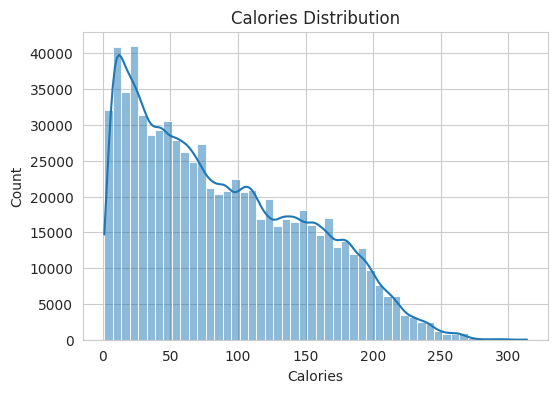

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df["Calories"], bins=50, kde=True)
plt.title("Calories Distribution")
plt.show()

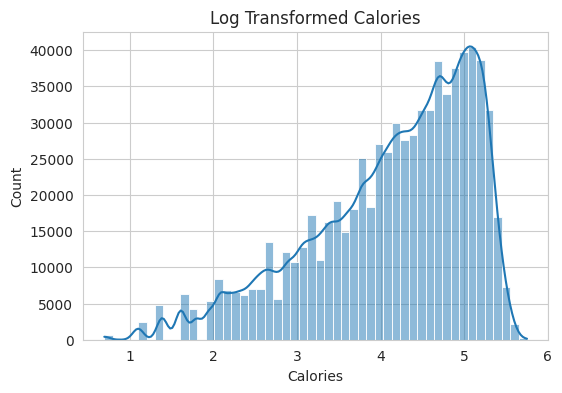

In [13]:
plt.figure(figsize=(6,4))
sns.histplot(np.log1p(df["Calories"]), bins=50, kde=True)
plt.title("Log Transformed Calories")
plt.show()

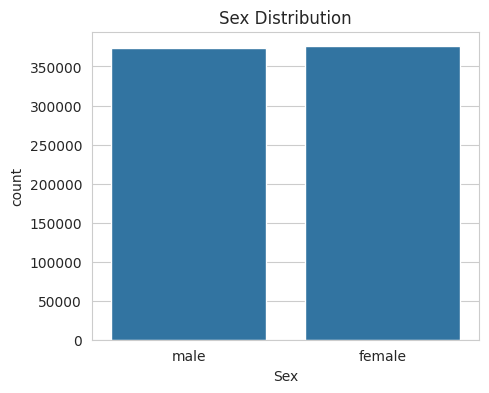

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(x="Sex", data=df)
plt.title("Sex Distribution")
plt.show()

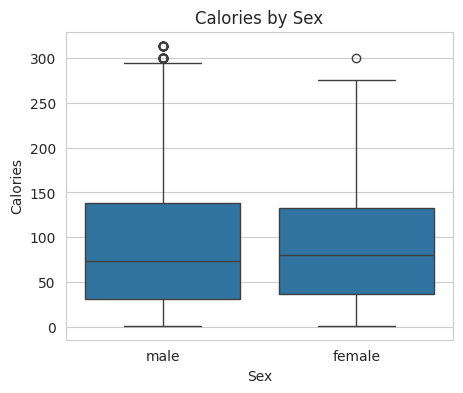

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Sex", y="Calories", data=df)
plt.title("Calories by Sex")
plt.show()

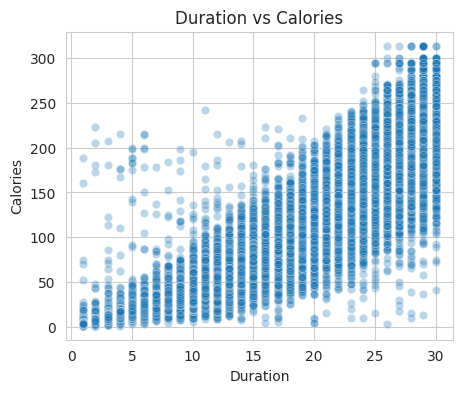

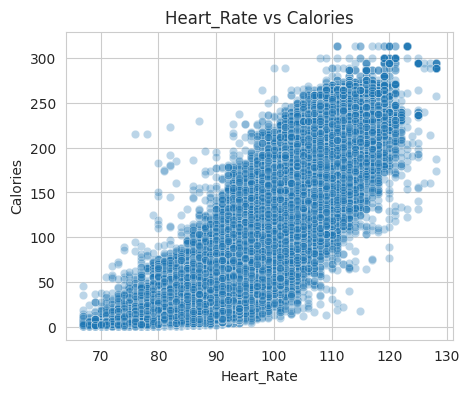

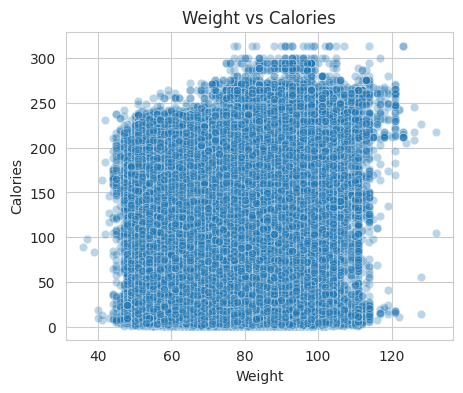

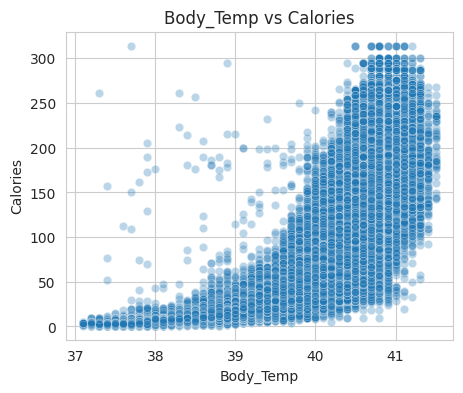

In [17]:
features = ["Duration", "Heart_Rate", "Weight", "Body_Temp"]

for col in features:
    plt.figure(figsize=(5,4))
    sns.scatterplot(x=df[col], y=df["Calories"], alpha=0.3)
    plt.title(f"{col} vs Calories")
    plt.show()


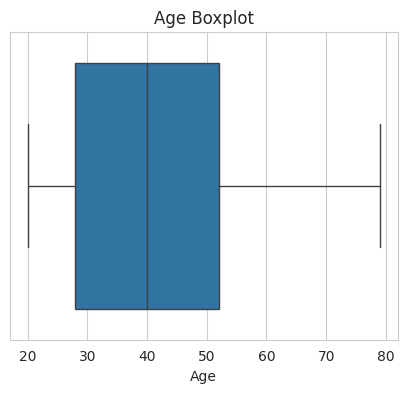

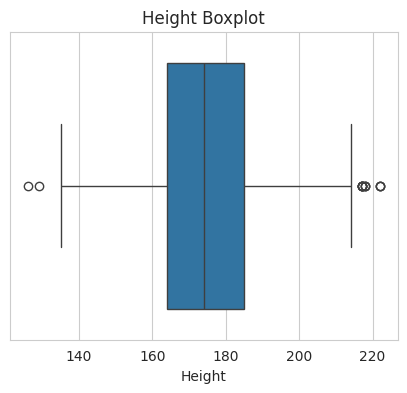

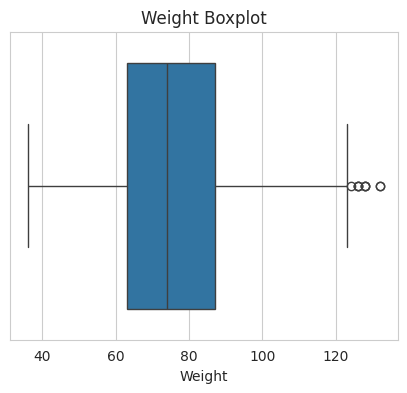

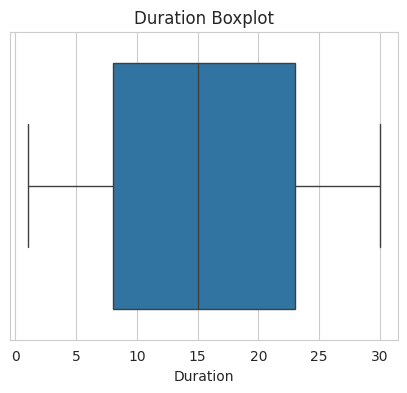

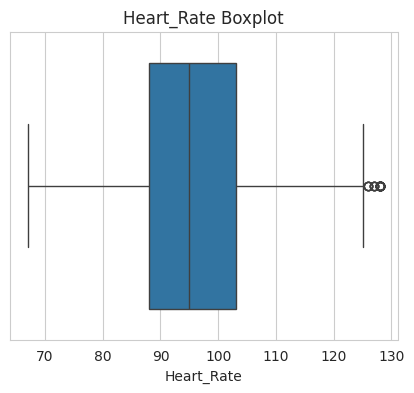

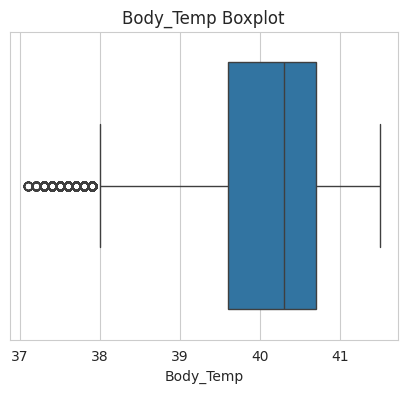

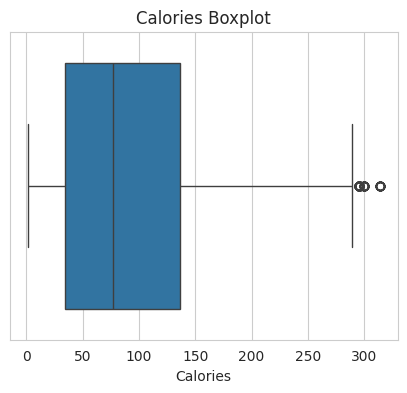

In [18]:
num_cols = ["Age","Height","Weight","Duration","Heart_Rate","Body_Temp","Calories"]

for col in num_cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()


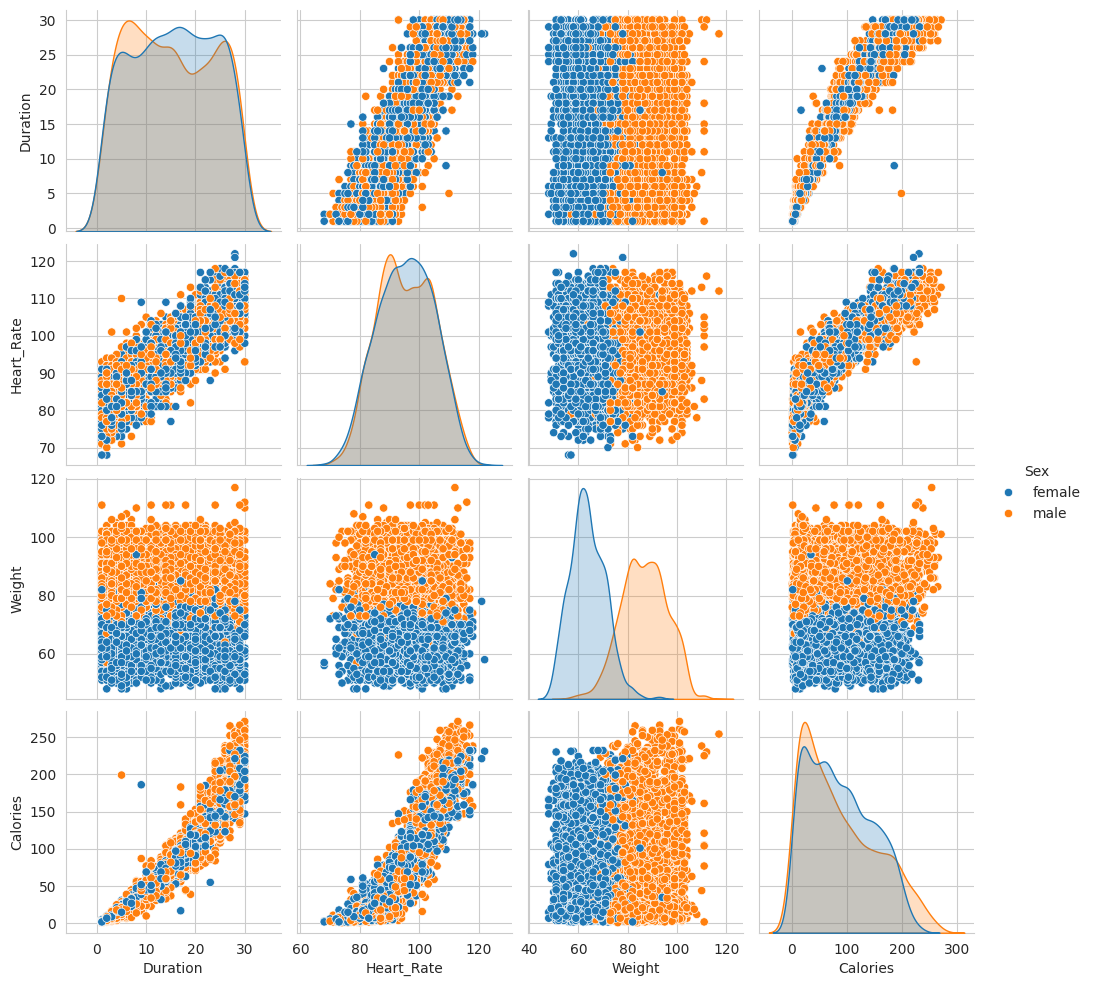

In [19]:
sample_df = df.sample(5000, random_state=42)

sns.pairplot(sample_df,
             vars=["Duration","Heart_Rate","Weight","Calories"],
             hue="Sex")
plt.show()


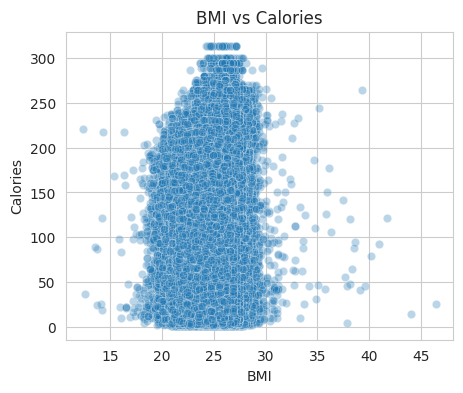

In [20]:
df["BMI"] = df["Weight"] / ((df["Height"]/100) ** 2)

plt.figure(figsize=(5,4))
sns.scatterplot(x=df["BMI"], y=df["Calories"], alpha=0.3)
plt.title("BMI vs Calories")
plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
 9   BMI         750000 non-null  float64
dtypes: float64(7), int64(2), object(1)
memory usage: 57.2+ MB


## *Modelling*

In [22]:
y = df["Calories"]
x = df.drop(columns=["Calories"])

In [23]:
x = pd.get_dummies(x, drop_first=True)  
# Kategorik değişkenleri (örneğin 'zipcode') one-hot encoding yöntemiyle sayısal değerlere dönüştürür.  
# drop_first=True, çoklu doğrusal bağımlılığı (dummy trap) önlemek için ilk kategoriyi kaldırır.

In [24]:
 x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=42
    )

In [27]:
from sklearn.metrics import mean_squared_log_error

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Uyarı mesajlarını gizler.
pd.set_option("display.max_columns",100)  # Tüm sütunların görünmesini sağlar.

# Gerekli model kütüphaneleri
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree, ExtraTreeRegressor
from xgboost import XGBRegressor  # XGBoost modeli
from sklearn.svm import SVR  # Destek vektör regresyonu
from sklearn.neural_network import MLPRegressor  # Yapay sinir ağı tabanlı regresyon

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.preprocessing import StandardScaler, MinMaxScaler  # Veri ölçekleme araçları

# Tüm modelleri test eden fonksiyon

def algo_test(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.20, random_state=42
    )
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    models = {
        "Linear": LinearRegression(),
        "Ridge": Ridge(),
        "Lasso": Lasso(),
        "ElasticNet": ElasticNet(),
        "GradientBoosting": GradientBoostingRegressor(),
        "DecisionTree": DecisionTreeRegressor(),
        "XGB": XGBRegressor(
            n_estimators=500,
            learning_rate=0.05,
            max_depth=6,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42,
            verbosity=0
        )
    }

    results = []

    for name, model in models.items():
        
        if name in ["Linear","Ridge","Lasso","ElasticNet"]:
            model.fit(X_train_scaled, y_train)
            preds = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train)
            preds = model.predict(X_test)
        
        # RMSLE için negatif değerleri engelle
        preds = np.maximum(0, preds)
        
        rmsle = np.sqrt(mean_squared_log_error(y_test, preds))
        
        results.append([
            name,
            rmsle
        ])

    return pd.DataFrame(results, columns=["Model","RMSLE"]).sort_values("RMSLE")


In [28]:
algo_test(x,y)

,Model,RMSLE
6,XGB,0.062544
5,DecisionTree,0.086533
4,GradientBoosting,0.129375
2,Lasso,0.469149
1,Ridge,0.566244
0,Linear,0.566777
3,ElasticNet,0.897836


## *DeepLearning*

In [31]:
from tensorflow.keras.models import Sequential
# Sequential: katmanları sırayla ekleyerek model kurmamızı sağlar

from tensorflow.keras.layers import Dense
# Dense: tam bağlantılı (fully connected) yapay sinir ağı katmanı

from sklearn.preprocessing import StandardScaler
# Verileri ölçeklemek (standartlaştırmak) için kullanılan sınıf

import matplotlib.pyplot as plt
# Grafik çizimleri (plot) yapmak için kullanılan kütüphane

from tensorflow.keras.callbacks import EarlyStopping

### *StandardScaler*

In [32]:
scaler = StandardScaler()
# StandardScaler nesnesi oluşturulur (ortalama=0, std=1 olacak şekilde ölçeklendirme yapar)

x = scaler.fit_transform(x)
# X verisi önce "fit" edilip (ortalama ve std hesaplanır)
# ardından "transform" edilip ölçeklendirilir
# Modelin daha hızlı ve stabil öğrenmesini sağlar

### *ANN*

In [33]:
y = np.log1p(y)


In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(128, activation='relu', input_shape=(x.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(32, activation='relu'))

model.add(Dense(1))

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.001)
)

2026-02-11 17:07:56.064327: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [36]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)


In [37]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 7091.8086 - val_loss: 3887.7314
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3958.6116 - val_loss: 3890.6772
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 3959.3838 - val_loss: 4047.1858
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3948.6875 - val_loss: 3867.2209
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3940.4707 - val_loss: 3868.8958
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3930.6782 - val_loss: 3869.9175
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3932.4607 - val_loss: 3860.6709
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3934.2290 - val_loss: 3878.3936
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 3819.3752 - val_loss: 3658.8696
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 984.0234 - val_loss: 411.9878
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 918.9102 

In [39]:
preds = model.predict(x_test)
preds = np.expm1(preds)

4688/4688 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step


## *Best Model*

In [40]:
best_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)

In [41]:
y_log = np.log1p(y)

best_model.fit(x, y_log)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

## *Save Model*

In [42]:
import joblib

joblib.dump(best_model, "final_model.pkl")

['final_model.pkl']

In [47]:
x = df.drop(columns=["id", "Calories"])
x = pd.get_dummies(x, drop_first=True)

In [49]:
feature_names = x.columns.tolist()

In [50]:
joblib.dump(feature_names, "model_features.pkl")

['model_features.pkl']

# *🏆 Final Results*

## *Best Model*
**XGBoost Regressor**

## Validation Score
RMSLE: ~0.0625

## *Key Observations*
- Duration is the strongest predictor.
- Heart Rate has high correlation with calories.
- Log transformation improves RMSLE stability.
- Boosting models outperform linear models.

## *Files Generated*
- `calorie_xgb_model.pkl`
- `model_features.pkl`

---

# *🚀 Next Steps*
- Hyperparameter tuning
- Feature interactions
- Stacking models
- Deployment with Streamlit / HuggingFace

Thank you for reading 🙌